In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of Applicant Loan Information

In [2]:
# Load the applicant loan info csv.
applicant = pd.read_csv('../Data Files/applicant_loan_info.csv')

# View the DataFrame.
applicant.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
0,8a99d3c6-0c94-491b-b0f8-d16f2e9d3208,03/01/2021,15000,48,home-improvements,80000,1.0,1000.0,NaN,2000,675.0,FT_EMPLOYED
1,1e2b35e1-de6b-4fcd-b56e-285c03b243f8,02/01/2021,25000,96,home-improvements,42500,0.0,100.0,NaN,1500,1100.0,FT_EMPLOYED
2,028daa02-99fd-4747-a1d8-573466a2cb1c,02/01/2021,20000,60,home-improvements,30000,0.0,NaN,NaN,300,180.0,FT_EMPLOYED
3,f42fd6cf-994d-4196-9835-885fd528a258,02/01/2021,12000,60,debt,48500,3.0,400.0,NaN,1400,0.0,FT_EMPLOYED
4,744b70fe-f53e-4348-8636-6095ee8cc8cd,02/01/2021,15000,48,home-improvements,165000,0.0,NaN,True,2500,1600.0,FT_EMPLOYED


In [3]:
# Check number of unique IDs
num_values = len(set(applicant['uuid']))

print(num_values)

76267


In [4]:
# Create a df to determine whether there are missing values.
applicant_na = applicant[applicant.isna().any(axis=1)]

# View the shape of the DataFrame.
applicant_na.shape

(162497, 12)

In [5]:
# Identify duplicate rows
applicant[applicant.duplicated()]

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status
58,abe4d48b-c1e7-4da5-bc68-85230c3275a8,04/01/2021,9000,48,home-improvements,33000,1.0,200.0,NaN,1541,665.0,FT_EMPLOYED
59,1ac73222-c9d9-4df6-94a5-51e393d7707d,04/01/2021,10000,48,debt,40000,0.0,NaN,NaN,1500,550.0,FT_EMPLOYED
104,f42fd6cf-994d-4196-9835-885fd528a258,02/01/2021,12000,60,debt,48500,3.0,400.0,NaN,1400,0.0,FT_EMPLOYED
114,bcd98a89-8d40-40a8-9cbd-1e406d8b819d,04/01/2021,10000,18,debt,50000,0.0,NaN,NaN,1000,0.0,FT_EMPLOYED
117,6ad05bed-adf4-4df2-b969-0da8b8dde297,04/01/2021,10000,48,other,27000,0.0,0.0,NaN,600,300.0,FT_EMPLOYED
...,...,...,...,...,...,...,...,...,...,...,...,...
172925,ae5e87eb-a40e-4273-8a4c-7b75f3f8d653,27/10/2021,13500,36,vehicle,27500,2.0,0.0,True,900,582.0,FT_EMPLOYED
172942,3de57ae9-9df4-4e64-b5cd-746e08d54f2e,28/10/2021,5000,24,home-improvements,36000,1.0,100.0,NaN,1000,575.0,FT_EMPLOYED
172944,d8e85de8-5d4c-42da-a8d9-9b848a55a23a,27/10/2021,12000,84,purchase,30000,3.0,0.0,NaN,500,0.0,FT_EMPLOYED
172955,b45282ad-69a2-4a15-8588-fe1e24c10119,28/10/2021,5000,24,other,42000,4.0,300.0,NaN,1200,600.0,FT_EMPLOYED


In [6]:
applicant.columns

Index(['uuid', 'date_created', 'amount_requested', 'duration_requested',
       'reason', 'annual_salary', 'dependant_number', 'dependants_spend',
       'has_mortgage', 'monthly_spending', 'rent_mortgage_spend',
       'employment_status'],
      dtype='object')

In [7]:
applicant.describe().round(2)

,amount_requested,duration_requested,annual_salary,dependant_number,dependants_spend,monthly_spending,rent_mortgage_spend
count,172961.00,172961.00,1.729610e+05,172960.00,7.770500e+04,172961.00,172960.00
mean,8498.55,44.79,8.706588e+04,0.73,7.494137e+04,894.31,418.06
std,7684.10,23.06,5.255660e+06,1.06,4.544032e+06,755.52,2736.81
min,1000.00,12.00,0.000000e+00,0.00,0.000000e+00,251.00,0.00
25%,3000.00,24.00,2.189200e+04,0.00,0.000000e+00,500.00,200.00
50%,6500.00,48.00,2.940000e+04,0.00,1.000000e+02,800.00,373.00
75%,11000.00,60.00,4.000000e+04,1.00,2.000000e+02,1100.00,540.00
max,100000.00,240.00,1.860020e+09,6.00,2.764472e+08,43431.00,830200.00


Text(0.5, 1.0, 'Annual Salary')

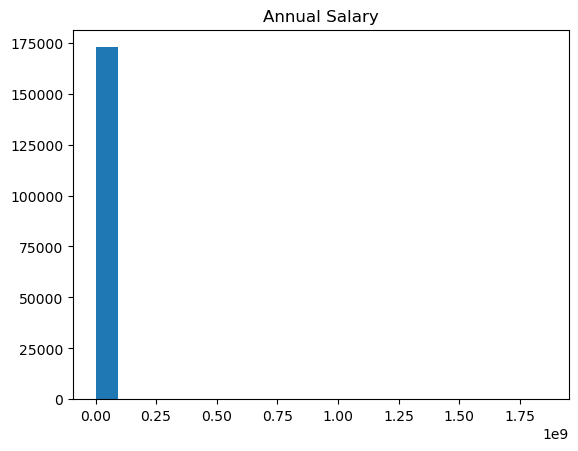

In [8]:
plt.hist(applicant['annual_salary'], bins=20)
plt.title('Annual Salary')

Text(0.5, 1.0, 'Monthly Spending')

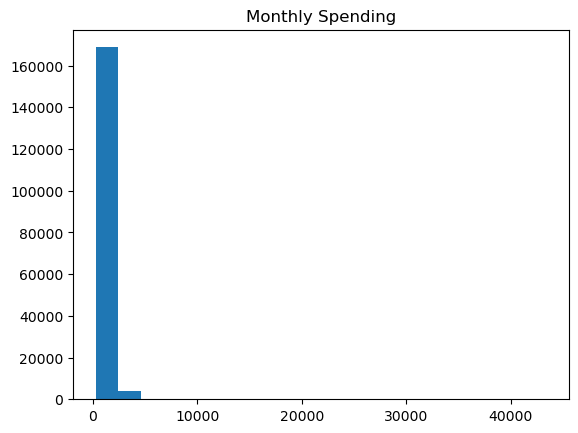

In [9]:
plt.hist(applicant['monthly_spending'], bins=20)
plt.title('Monthly Spending')

Text(0.5, 1.0, 'Annual Salary')

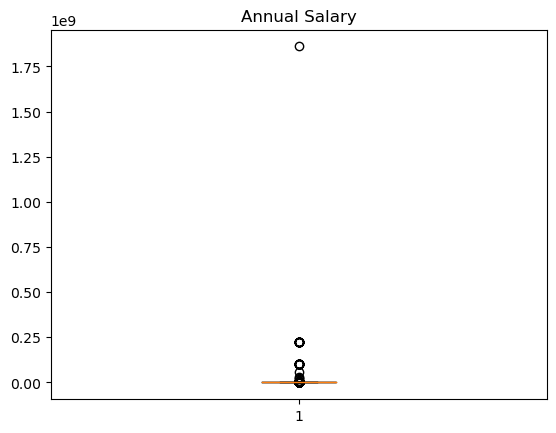

In [10]:
plt.boxplot(applicant['annual_salary'])
plt.title('Annual Salary')

In [11]:
applicant = applicant.query('annual_salary < 1000000')

Text(0.5, 1.0, 'Annual Salary < £1,000,000')

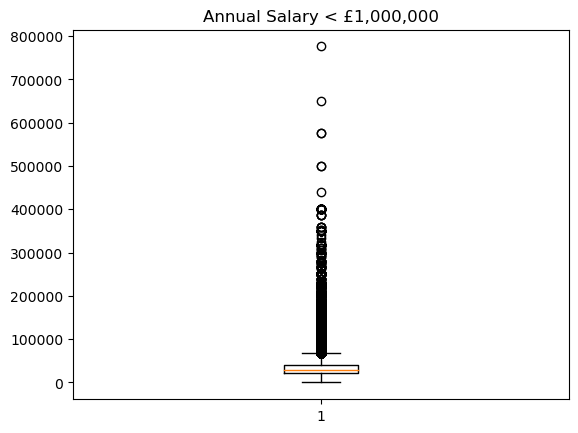

In [12]:
plt.boxplot(applicant['annual_salary'])
plt.title('Annual Salary < £1,000,000')

In [13]:
applicant = applicant.query('monthly_spending < 10000')

Text(0.5, 1.0, 'Monthly Spending < £10,000')

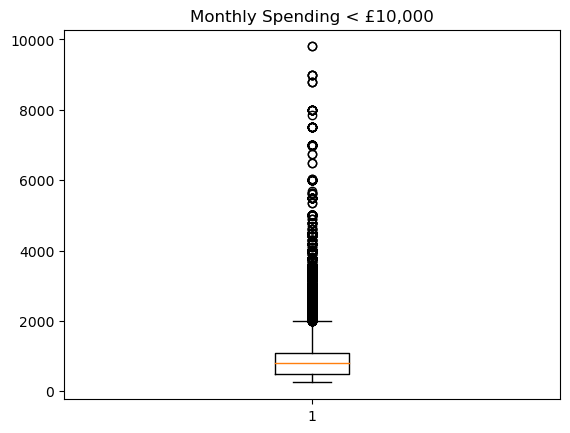

In [14]:
plt.boxplot(applicant['monthly_spending'])
plt.title('Monthly Spending < £10,000')

Text(0.5, 1.0, 'Annual Salary < £1,000,000')

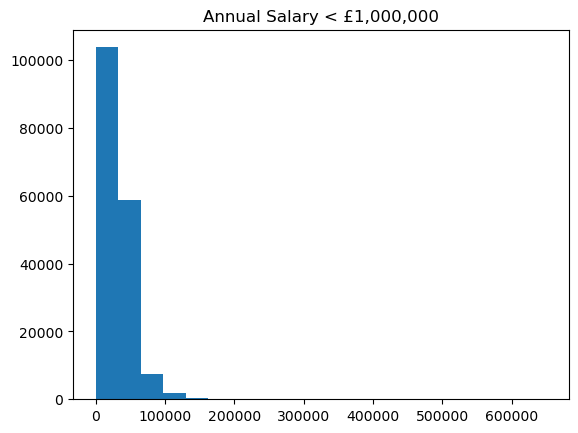

In [15]:
plt.hist(applicant['annual_salary'], bins=20)
plt.title('Annual Salary < £1,000,000')

Text(0.5, 1.0, 'Monthly Spending < £10,000')

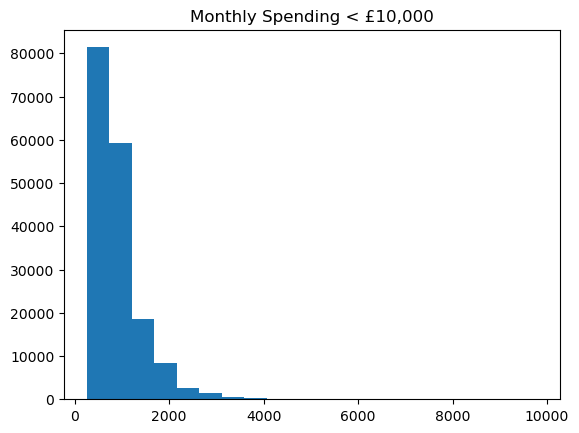

In [16]:
plt.hist(applicant['monthly_spending'], bins=20)
plt.title('Monthly Spending < £10,000')

Text(0, 0.5, 'Monthly Spending < £10,000')

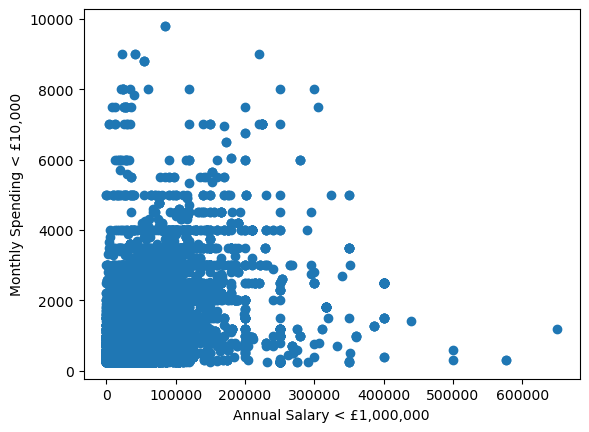

In [17]:
plt.scatter(applicant['annual_salary'], applicant['monthly_spending'])
plt.xlabel('Annual Salary < £1,000,000')
plt.ylabel('Monthly Spending < £10,000')

Text(0, 0.5, 'Amount Requested (£)')

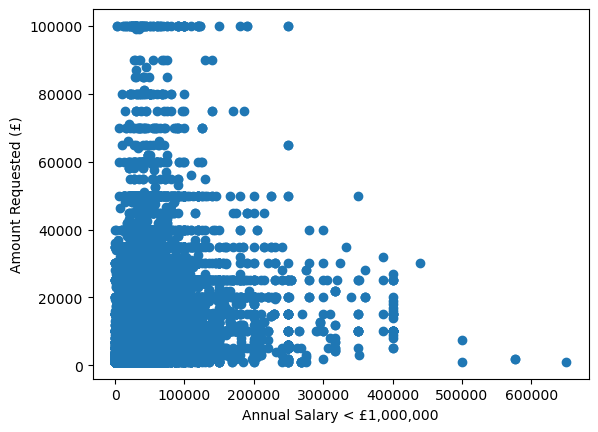

In [18]:
plt.scatter(applicant['annual_salary'], applicant['amount_requested'])
plt.xlabel('Annual Salary < £1,000,000')
plt.ylabel('Amount Requested (£)')

In [19]:
applicant['request/duration'] = applicant['amount_requested']/applicant['duration_requested']

In [20]:
applicant['request_over_salary'] = (applicant['amount_requested']/applicant['annual_salary'])

In [21]:
applicant.head()

,uuid,date_created,amount_requested,duration_requested,reason,annual_salary,dependant_number,dependants_spend,has_mortgage,monthly_spending,rent_mortgage_spend,employment_status,request/duration,request_over_salary
0,8a99d3c6-0c94-491b-b0f8-d16f2e9d3208,03/01/2021,15000,48,home-improvements,80000,1.0,1000.0,NaN,2000,675.0,FT_EMPLOYED,312.500000,0.187500
1,1e2b35e1-de6b-4fcd-b56e-285c03b243f8,02/01/2021,25000,96,home-improvements,42500,0.0,100.0,NaN,1500,1100.0,FT_EMPLOYED,260.416667,0.588235
2,028daa02-99fd-4747-a1d8-573466a2cb1c,02/01/2021,20000,60,home-improvements,30000,0.0,NaN,NaN,300,180.0,FT_EMPLOYED,333.333333,0.666667
3,f42fd6cf-994d-4196-9835-885fd528a258,02/01/2021,12000,60,debt,48500,3.0,400.0,NaN,1400,0.0,FT_EMPLOYED,200.000000,0.247423
4,744b70fe-f53e-4348-8636-6095ee8cc8cd,02/01/2021,15000,48,home-improvements,165000,0.0,NaN,True,2500,1600.0,FT_EMPLOYED,312.500000,0.090909


Text(0, 0.5, 'Request/Duration (£/month)')

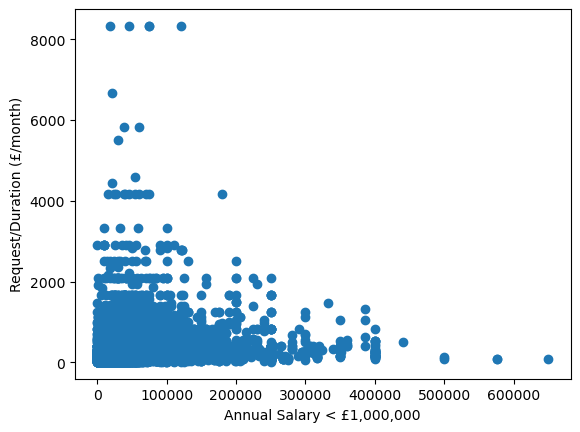

In [22]:
plt.scatter(applicant['annual_salary'], applicant['request/duration'])
plt.xlabel('Annual Salary < £1,000,000')
plt.ylabel('Request/Duration (£/month)')

Text(0, 0.5, 'request_over_salary')

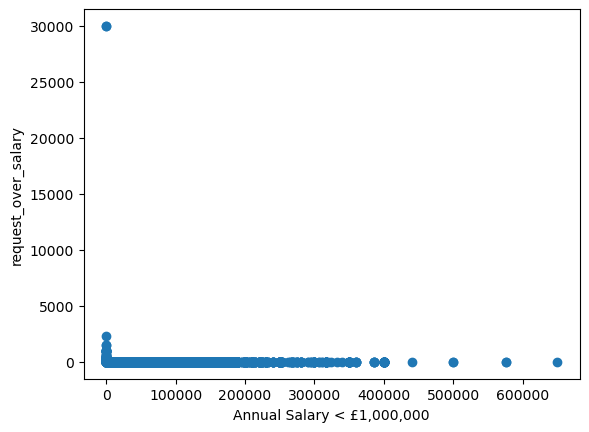

In [23]:
plt.scatter(applicant['annual_salary'], applicant['request_over_salary'])
plt.xlabel('Annual Salary < £1,000,000')
plt.ylabel('request_over_salary')

In [24]:
applicant = applicant.query('request_over_salary < 10000')

Text(0, 0.5, 'Request/Salary')

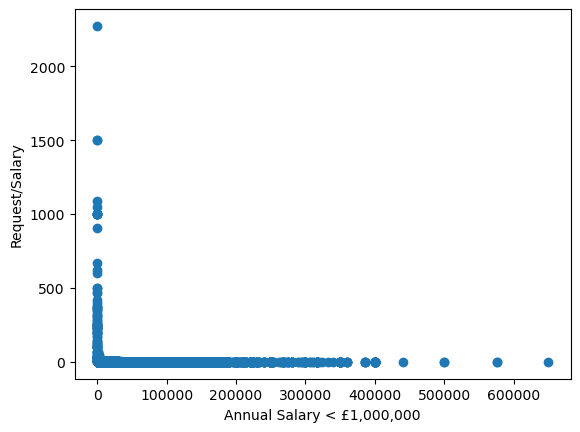

In [25]:
plt.scatter(applicant['annual_salary'], applicant['request_over_salary'])
plt.xlabel('Annual Salary < £1,000,000')
plt.ylabel('Request/Salary')

Text(0, 0.5, 'Amount Requested (£)')

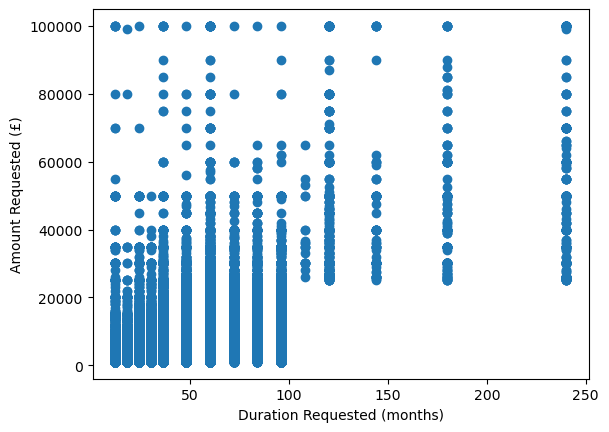

In [26]:
plt.scatter(applicant['duration_requested'], applicant['amount_requested'])
plt.xlabel('Duration Requested (months)')
plt.ylabel('Amount Requested (£)')

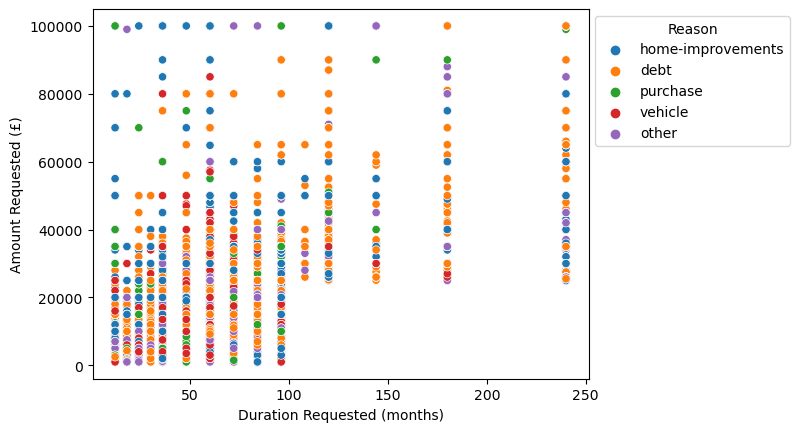

In [27]:
fig1, ax = plt.subplots()
sns.scatterplot(x='duration_requested',
             y='amount_requested',
             hue='reason',
             data=applicant)
ax.set_xlabel('Duration Requested (months)')
ax.set_ylabel('Amount Requested (£)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend_.set_title('Reason')

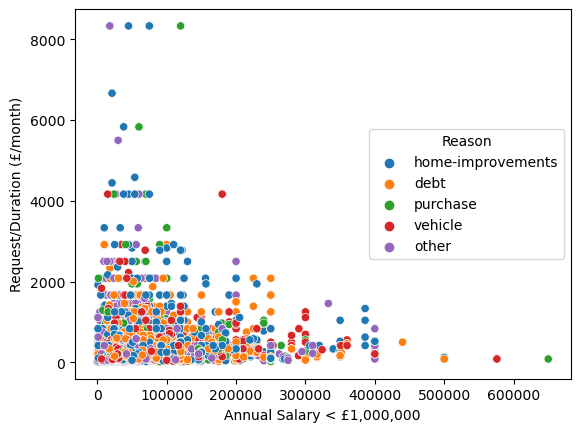

In [28]:
fig1, ax = plt.subplots()
sns.scatterplot(x='annual_salary',
             y='request/duration',
             hue='reason',
             data=applicant)
ax.set_xlabel('Annual Salary < £1,000,000')
ax.set_ylabel('Request/Duration (£/month)')
ax.legend(loc=7)
ax.legend_.set_title('Reason')

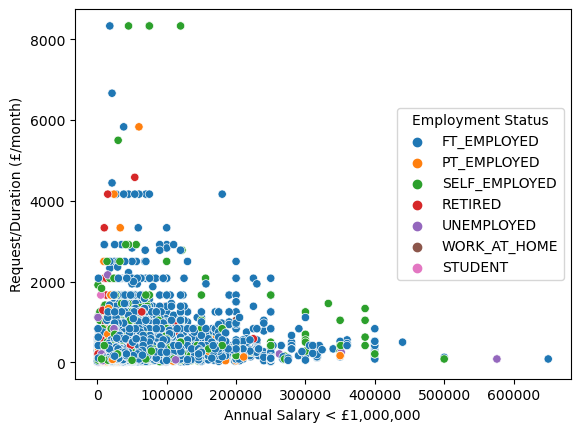

In [29]:
fig1, ax = plt.subplots()
sns.scatterplot(x='annual_salary',
             y='request/duration',
             hue='employment_status',
             data=applicant)
ax.set_xlabel('Annual Salary < £1,000,000')
ax.set_ylabel('Request/Duration (£/month)')
ax.legend(loc=7)
ax.legend_.set_title('Employment Status')

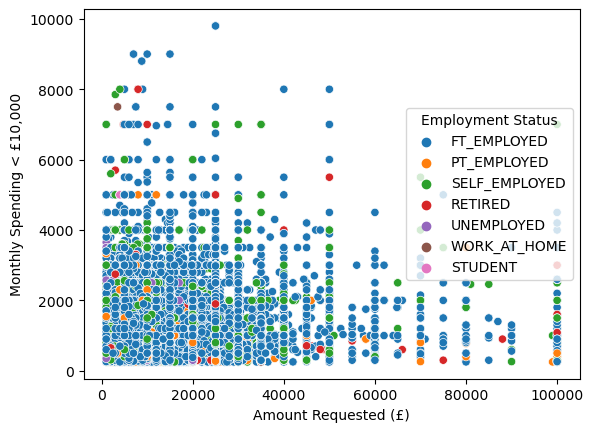

In [30]:
fig1, ax = plt.subplots()
sns.scatterplot(x='amount_requested',
             y='monthly_spending',
             hue='employment_status',
             data=applicant)
ax.set_xlabel('Amount Requested (£)')
ax.set_ylabel('Monthly Spending < £10,000')
ax.legend(loc=7)
ax.legend_.set_title('Employment Status')

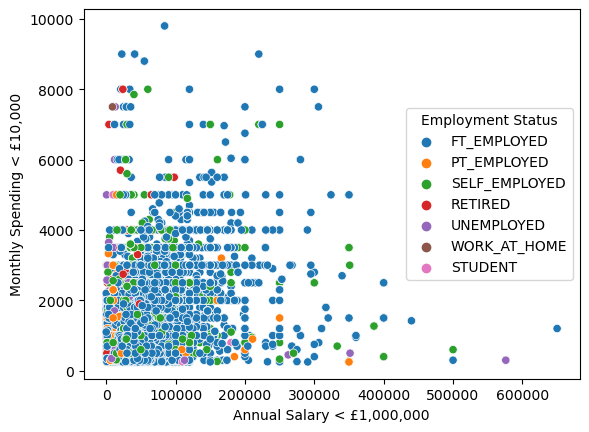

In [31]:
fig1, ax = plt.subplots()
sns.scatterplot(x='annual_salary',
             y='monthly_spending',
             hue='employment_status',
             data=applicant)
ax.set_xlabel('Annual Salary < £1,000,000')
ax.set_ylabel('Monthly Spending < £10,000')
ax.legend(loc=7)
ax.legend_.set_title('Employment Status')

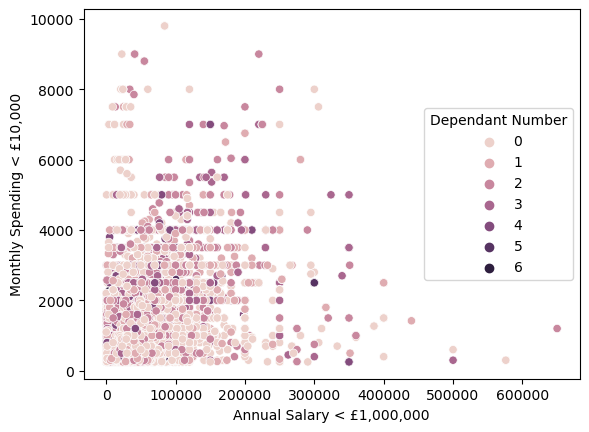

In [32]:
fig1, ax = plt.subplots()
sns.scatterplot(x='annual_salary',
             y='monthly_spending',
             hue='dependant_number',
             data=applicant)
ax.set_xlabel('Annual Salary < £1,000,000')
ax.set_ylabel('Monthly Spending < £10,000')
ax.legend(loc=7)
ax.legend_.set_title('Dependant Number')

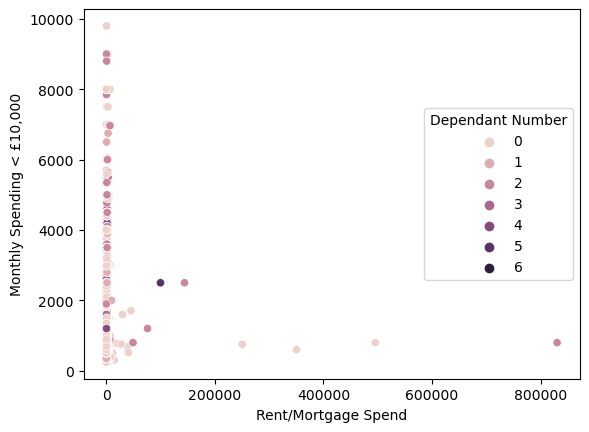

In [33]:
fig1, ax = plt.subplots()
sns.scatterplot(x='rent_mortgage_spend',
             y='monthly_spending',
             hue='dependant_number',
             data=applicant)
ax.set_xlabel('Rent/Mortgage Spend')
ax.set_ylabel('Monthly Spending < £10,000')
ax.legend(loc=7)
ax.legend_.set_title('Dependant Number')

In [34]:
applicant = applicant.query('rent_mortgage_spend > 0')

In [35]:
applicant = applicant.query('rent_mortgage_spend < 10000')

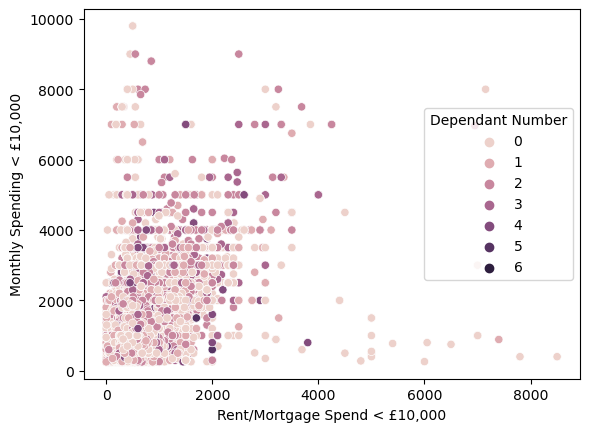

In [36]:
fig1, ax = plt.subplots()
sns.scatterplot(x='rent_mortgage_spend',
             y='monthly_spending',
             hue='dependant_number',
             data=applicant)
ax.set_xlabel('Rent/Mortgage Spend < £10,000')
ax.set_ylabel('Monthly Spending < £10,000')
ax.legend(loc=7)
ax.legend_.set_title('Dependant Number')

[Text(0, 0, 'FT_EMPLOYED'),
 Text(1, 0, 'PT_EMPLOYED'),
 Text(2, 0, 'SELF_EMPLOYED'),
 Text(3, 0, 'UNEMPLOYED'),
 Text(4, 0, 'RETIRED'),
 Text(5, 0, 'STUDENT'),
 Text(6, 0, 'WORK_AT_HOME')]

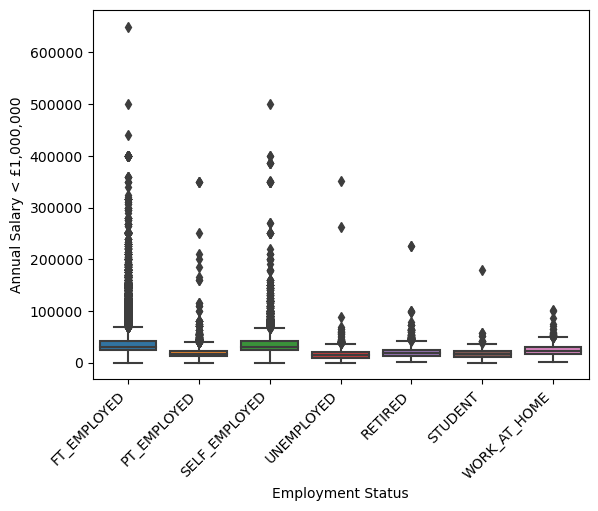

In [37]:
fig1, ax = plt.subplots()
sns.boxplot(y='annual_salary',
             x='employment_status',
             data=applicant)
ax.set_xlabel('Employment Status')
ax.set_ylabel('Annual Salary < £1,000,000')
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

[Text(0, 0, 'FT_EMPLOYED'),
 Text(1, 0, 'PT_EMPLOYED'),
 Text(2, 0, 'SELF_EMPLOYED'),
 Text(3, 0, 'UNEMPLOYED'),
 Text(4, 0, 'RETIRED'),
 Text(5, 0, 'STUDENT'),
 Text(6, 0, 'WORK_AT_HOME')]

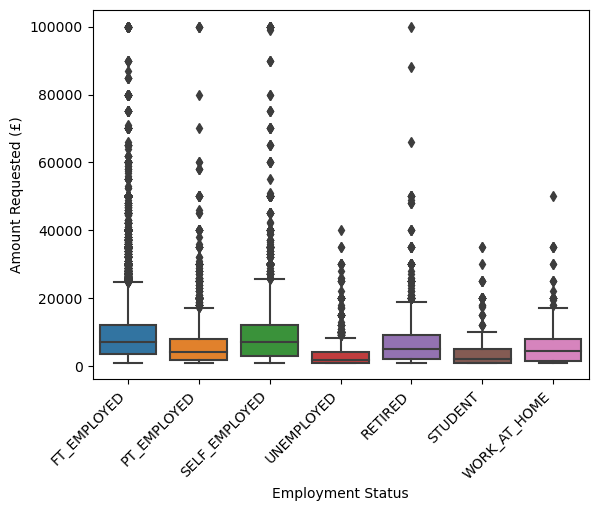

In [38]:
fig1, ax = plt.subplots()
sns.boxplot(y='amount_requested',
             x='employment_status',
             data=applicant)
ax.set_xlabel('Employment Status')
ax.set_ylabel('Amount Requested (£)')
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# EDA of Bureau Data

In [39]:
# Load the bureau data csv.
bureau = pd.read_csv('../Data Files/bureau_data.csv')

# View the DataFrame.
bureau.head()

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
0,f0e04621-dcf5-4283-9362-22210837f0d1,02/03/2021,0,25000.0,20000.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dfbdc495-5003-43ae-9169-17c8b8605d54,30/11/2020,0,60000.0,60000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ebbb9908-d1c7-4a7a-adf9-2863e91cf22b,04/12/2020,0,45000.0,40000.0,500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1de1b5b5-34d7-42b9-9db3-7b734ecec27c,04/05/2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e88fc99-fb26-4d47-ad4e-679809693501,17/06/2021,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Check number of unique IDs
num_values = len(set(bureau['uuid']))

print(num_values)

108472


In [41]:
# Create a df to determine whether there are missing values.
bureau_na = bureau[bureau.isna().any(axis=1)]

# View the shape of the DataFrame.
bureau_na.shape

(87006, 13)

In [42]:
# Identify duplicate rows
bureau[bureau.duplicated()]

,uuid,date_created,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3


In [43]:
bureau.columns

Index(['uuid', 'date_created', 'new_to_credit_on_date_created',
       'salary_band_5000s', 'salary_band_10000s', 'credit_score_100s',
       'has_mortgage', 'self_employed_flag', 'ccj_flag',
       'missed_2+_payments_past_36m', 'o1', 'o2', 'o3'],
      dtype='object')

In [44]:
bureau.describe().round(2)

,new_to_credit_on_date_created,salary_band_5000s,salary_band_10000s,credit_score_100s,has_mortgage,self_employed_flag,ccj_flag,missed_2+_payments_past_36m,o1,o2,o3
count,142315.00,55309.00,55309.00,55316.00,55316.00,55316.00,55316.00,55316.00,55316.00,55316.00,55316.00
mean,0.65,37041.44,34704.48,368.69,0.30,0.03,0.04,0.03,0.02,0.02,0.01
std,0.48,132247.14,132307.94,92.04,0.46,0.18,0.21,0.16,0.15,0.13,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,25000.00,20000.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,30000.00,30000.00,400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,40000.00,40000.00,400.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,27770000.00,27770000.00,600.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Text(0.5, 1.0, 'Salary band 10000s against salary band 5000s')

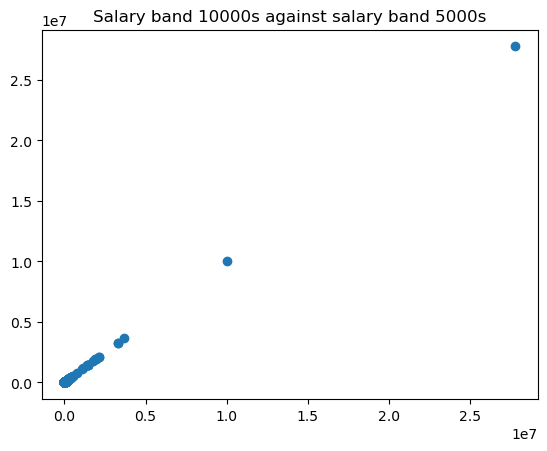

In [45]:
plt.scatter(bureau['salary_band_10000s'], bureau['salary_band_5000s'])
plt.title("Salary band 10000s against salary band 5000s")

#### Can effectively use one or the other, very high level of correlation

In [46]:
bureau = bureau.query('salary_band_10000s < 500000')

Text(0.5, 1.0, 'Salary band 10000s - under £500k')

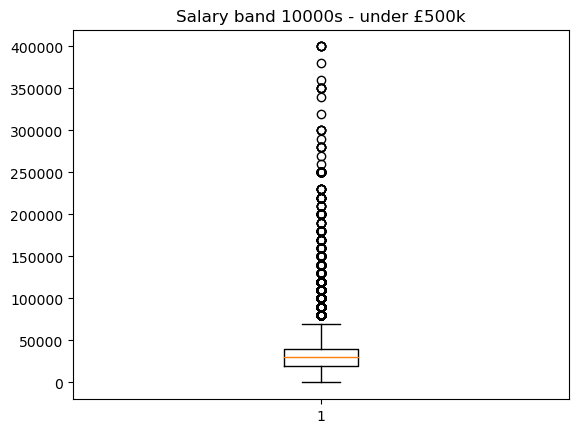

In [47]:
plt.boxplot(bureau['salary_band_10000s'])
plt.title("Salary band 10000s - under £500k")

Text(0.5, 1.0, 'Salary band 10000s - under £500k')

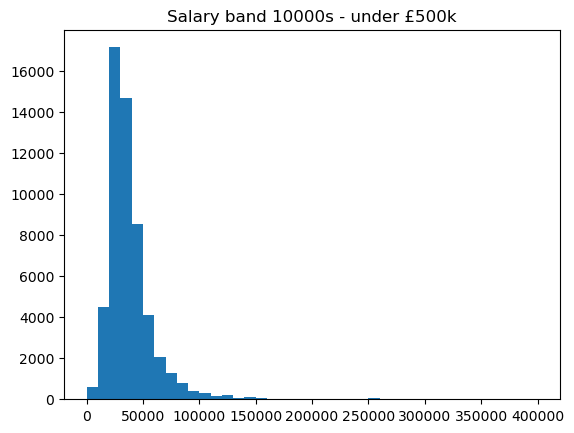

In [48]:
plt.hist(bureau['salary_band_10000s'], bins = 40)
plt.title("Salary band 10000s - under £500k")

Text(0, 0.5, 'Credit Score')

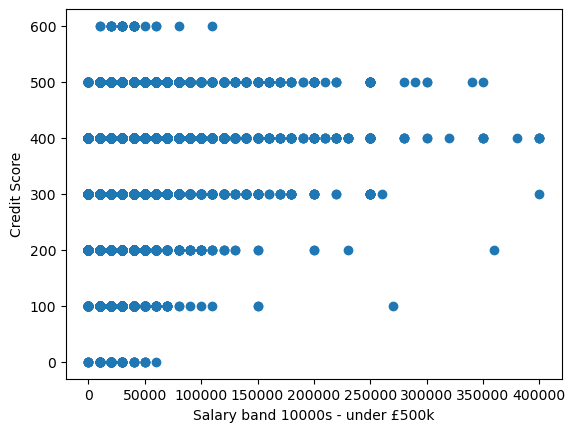

In [49]:
plt.scatter(bureau['salary_band_10000s'],
            bureau['credit_score_100s'])
plt.xlabel('Salary band 10000s - under £500k')
plt.ylabel('Credit Score')

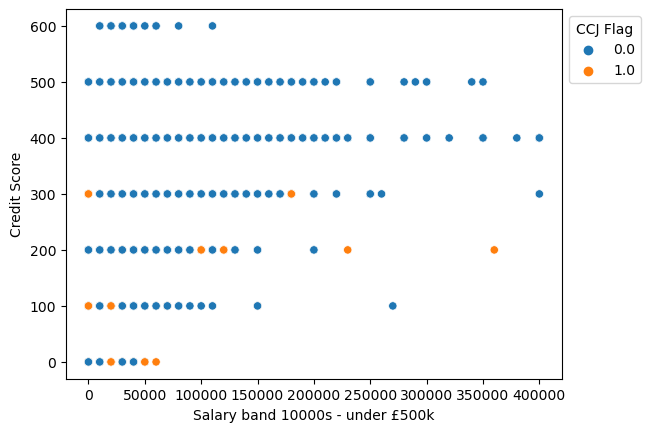

In [50]:
fig1, ax = plt.subplots()
sns.scatterplot(x='salary_band_10000s',
                y='credit_score_100s',
                hue='ccj_flag',
                data=bureau)
ax.set_xlabel('Salary band 10000s - under £500k')
ax.set_ylabel('Credit Score')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend_.set_title('CCJ Flag')

# EDA of Summary Block

In [51]:
# Load the summary block csv.
summary = pd.read_csv('../Data Files/summary_block.csv')

# View the DataFrame.
summary.head()

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
0,7c595a50-af02-49d9-9d41-06ec90fd6a6a,10/07/2021,24,74,145,271,87,283,578,1093,...,NaN,NaN,NaN,-0.3121,0.0,0.0000,-0.0187,NaN,NaN,NaN
1,7c66ea4c-544a-41dd-928d-e959fc2dde96,05/08/2021,25,70,144,297,125,473,935,1972,...,NaN,NaN,NaN,-0.6014,0.0,-0.0324,-0.0018,NaN,NaN,NaN
2,7c83dd8e-e2f7-4e0b-b76e-34702212cbb4,07/07/2021,16,41,41,41,50,127,127,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7caaa061-84d7-4852-b501-a139b0158e9d,28/04/2021,24,69,136,249,76,232,490,900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7cb38c91-6028-4bd9-8dcc-45ef65eebcfb,15/04/2021,17,49,112,219,43,133,373,714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Create a df to determine whether there are missing values.
summary_na = summary[summary.isna().any(axis=1)]

# View the shape of the DataFrame.
summary_na.shape

(40108, 166)

In [53]:
# Identify duplicate rows
summary[summary.duplicated()]

,uuid,date_created,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days


In [54]:
summary.columns

Index(['uuid', 'date_created', 'unique_transaction_date_count_last_30_days',
       'unique_transaction_date_count_last_90_days',
       'unique_transaction_date_count_last_180_days',
       'unique_transaction_date_count_last_360_days',
       'transaction_count_last_30_days', 'transaction_count_last_90_days',
       'transaction_count_last_180_days', 'transaction_count_last_360_days',
       ...
       'used_savings_last_180_days', 'used_bnpl_last_180_days',
       'used_payday_last_180_days',
       'essential_spending_over_income_last_360_days',
       'benefits_over_income_last_360_days',
       'savings_over_income_last_360_days',
       'gambling_over_income_last_360_days', 'used_savings_last_360_days',
       'used_bnpl_last_360_days', 'used_payday_last_360_days'],
      dtype='object', length=166)

In [55]:
summary.describe().round(2)

,unique_transaction_date_count_last_30_days,unique_transaction_date_count_last_90_days,unique_transaction_date_count_last_180_days,unique_transaction_date_count_last_360_days,transaction_count_last_30_days,transaction_count_last_90_days,transaction_count_last_180_days,transaction_count_last_360_days,transaction_count_current_account_last_30_days,transaction_count_current_account_last_90_days,...,used_savings_last_180_days,used_bnpl_last_180_days,used_payday_last_180_days,essential_spending_over_income_last_360_days,benefits_over_income_last_360_days,savings_over_income_last_360_days,gambling_over_income_last_360_days,used_savings_last_360_days,used_bnpl_last_360_days,used_payday_last_360_days
count,40108.00,40108.00,40108.00,40108.00,40108.00,40108.00,40108.00,40108.00,40108.00,40108.00,...,3592.0,2283.0,383.0,20879.00,20879.00,20879.00,20879.00,4840.0,3167.0,608.0
mean,20.89,61.63,120.43,234.08,107.10,311.29,598.54,1135.99,103.21,300.41,...,1.0,1.0,1.0,-443.99,0.23,-143.10,-48.56,1.0,1.0,1.0
std,5.95,17.83,37.00,77.81,70.21,200.99,381.89,720.06,67.59,193.51,...,0.0,0.0,0.0,19290.41,0.38,8460.75,3439.95,0.0,0.0,0.0
min,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.0,1.0,1.0,-2239823.00,0.00,-597800.00,-400884.00,1.0,1.0,1.0
25%,18.00,55.00,107.00,209.00,64.00,189.00,363.00,686.00,61.00,181.00,...,1.0,1.0,1.0,-2.24,0.00,0.00,-0.08,1.0,1.0,1.0
50%,21.00,62.00,122.00,243.00,96.00,280.00,543.00,1043.00,93.00,272.00,...,1.0,1.0,1.0,-0.58,0.00,0.00,-0.01,1.0,1.0,1.0
75%,25.00,75.00,147.00,287.00,136.00,394.00,762.00,1456.00,132.00,383.00,...,1.0,1.0,1.0,-0.22,0.40,0.00,0.00,1.0,1.0,1.0
max,30.00,90.00,180.00,360.00,1416.00,7058.00,12478.00,15750.00,1303.00,6884.00,...,1.0,1.0,1.0,0.00,1.00,0.00,0.00,1.0,1.0,1.0


In [56]:
summary['total_income_broad_last_360_days'].describe().round(2)

count     40108.00
mean       4470.11
std       10323.31
min           0.00
25%           0.00
50%           0.00
75%        2288.00
max      162508.29
Name: total_income_broad_last_360_days, dtype: float64

(array([3.3049e+04, 2.4580e+03, 2.3110e+03, 1.2010e+03, 4.8500e+02,
        2.6500e+02, 1.4500e+02, 6.3000e+01, 4.8000e+01, 3.0000e+01,
        1.4000e+01, 1.3000e+01, 1.7000e+01, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.    ,   8125.4145,  16250.829 ,  24376.2435,  32501.658 ,
         40627.0725,  48752.487 ,  56877.9015,  65003.316 ,  73128.7305,
         81254.145 ,  89379.5595,  97504.974 , 105630.3885, 113755.803 ,
        121881.2175, 130006.632 , 138132.0465, 146257.461 , 154382.8755,
        162508.29  ]),
 <BarContainer object of 20 artists>)

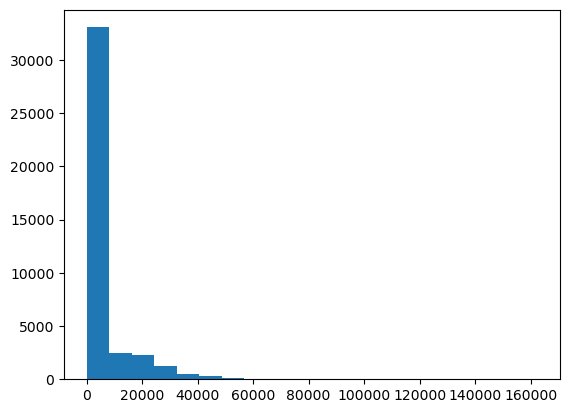

In [57]:
plt.hist(summary['total_income_narrow_last_360_days'], bins = 20)

(array([3.3049e+04, 2.4580e+03, 2.3110e+03, 1.2010e+03, 4.8500e+02,
        2.6500e+02, 1.4500e+02, 6.3000e+01, 4.8000e+01, 3.0000e+01,
        1.4000e+01, 1.3000e+01, 1.7000e+01, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.    ,   8125.4145,  16250.829 ,  24376.2435,  32501.658 ,
         40627.0725,  48752.487 ,  56877.9015,  65003.316 ,  73128.7305,
         81254.145 ,  89379.5595,  97504.974 , 105630.3885, 113755.803 ,
        121881.2175, 130006.632 , 138132.0465, 146257.461 , 154382.8755,
        162508.29  ]),
 <BarContainer object of 20 artists>)

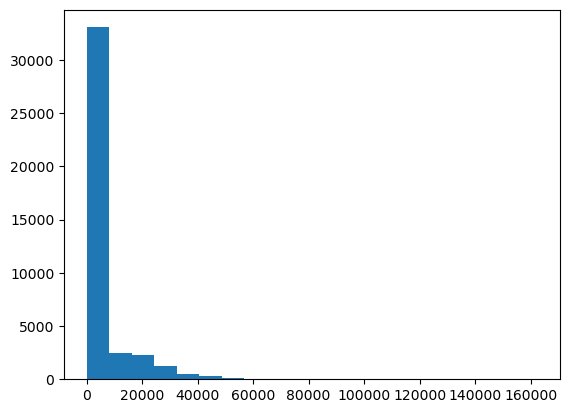

In [58]:
plt.hist(summary['total_income_broad_last_360_days'], bins=20)

Text(0, 0.5, 'total_income_narrow_last_360_days')

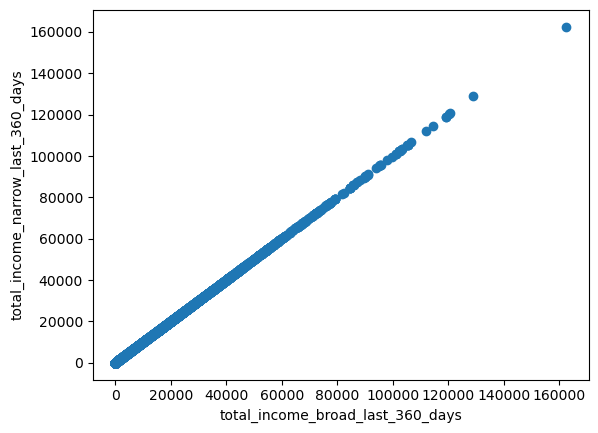

In [59]:
plt.scatter(summary['total_income_broad_last_360_days'], summary['total_income_narrow_last_360_days'])
plt.xlabel('total_income_broad_last_360_days')
plt.ylabel('total_income_narrow_last_360_days')

In [60]:
summary['broad income - narrow income'] = summary['total_income_broad_last_360_days'] - summary['total_income_narrow_last_360_days']

In [61]:
summary['broad income - narrow income'].describe().round(2)

count    40108.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: broad income - narrow income, dtype: float64

#### Never any difference between narrow and broad income. Matches up with summary block only being for those with no standard income

In [62]:
summary_18k = summary.query('total_income_broad_last_360_days > 18000')

In [63]:
summary_18k['total_income_broad_last_360_days'].describe().round(2)

count      4083.00
mean      30056.09
std       13738.80
min       18000.09
25%       21295.06
50%       25840.76
75%       33547.20
max      162508.29
Name: total_income_broad_last_360_days, dtype: float64

(array([1.935e+03, 1.056e+03, 4.530e+02, 2.660e+02, 1.290e+02, 1.010e+02,
        3.600e+01, 3.200e+01, 2.400e+01, 1.700e+01, 8.000e+00, 1.300e+01,
        5.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 18000.09,  25225.5 ,  32450.91,  39676.32,  46901.73,  54127.14,
         61352.55,  68577.96,  75803.37,  83028.78,  90254.19,  97479.6 ,
        104705.01, 111930.42, 119155.83, 126381.24, 133606.65, 140832.06,
        148057.47, 155282.88, 162508.29]),
 <BarContainer object of 20 artists>)

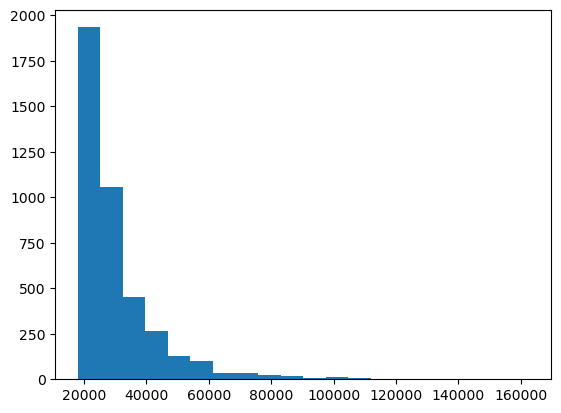

In [64]:
plt.hist(summary_18k['total_income_broad_last_360_days'], bins=20)

Text(0, 0.5, 'Bills/Utilities Spend')

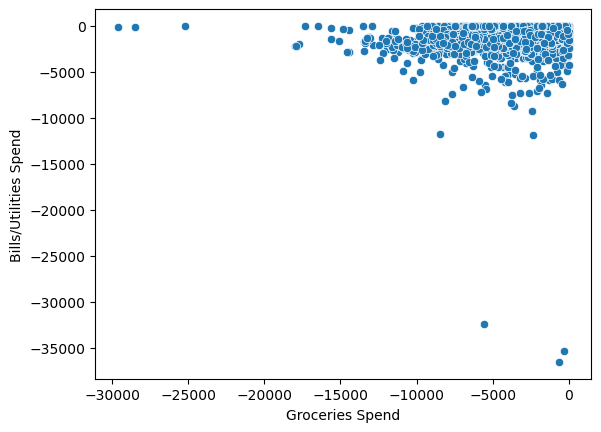

In [65]:
fig1, ax = plt.subplots()
sns.scatterplot(x='total_groceries_spend_last_360_days',
             y='total_bills_and_utilities_spend_last_360_days',
             data=summary_18k)
ax.set_xlabel('Groceries Spend')
ax.set_ylabel('Bills/Utilities Spend')

In [66]:
summary_18k = summary_18k.query('total_groceries_spend_last_360_days > -20000')

summary_18k = summary_18k.query('total_bills_and_utilities_spend_last_360_days > -20000')

Text(0, 0.5, 'Bills/Utilities Spend')

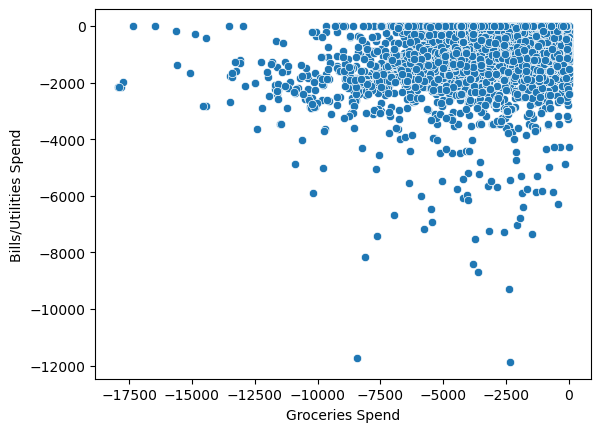

In [67]:
fig1, ax = plt.subplots()
sns.scatterplot(x='total_groceries_spend_last_360_days',
             y='total_bills_and_utilities_spend_last_360_days',
             data=summary_18k)
ax.set_xlabel('Groceries Spend')
ax.set_ylabel('Bills/Utilities Spend')

In [68]:
# (Re)load the dataset
summary_data = pd.read_csv('../Data Files/summary_block.csv')

In [69]:
# Data Exploration
print(summary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Columns: 166 entries, uuid to used_payday_last_360_days
dtypes: float64(120), int64(44), object(2)
memory usage: 50.8+ MB
None


In [70]:
# Summary statistics
print(summary_data.describe())

       unique_transaction_date_count_last_30_days  \
count                                40108.000000   
mean                                    20.890371   
std                                      5.954145   
min                                      0.000000   
25%                                     18.000000   
50%                                     21.000000   
75%                                     25.000000   
max                                     30.000000   

       unique_transaction_date_count_last_90_days  \
count                                40108.000000   
mean                                    61.626907   
std                                     17.825381   
min                                      0.000000   
25%                                     55.000000   
50%                                     62.000000   
75%                                     75.000000   
max                                     90.000000   

       unique_transaction_date_count_last_18

In [71]:
# Count number of unique IDs
from collections import Counter

num_values = len(Counter(summary_data['uuid']).keys())
print(num_values)

25368


In [72]:
# Check with a different method
num_values = len(set(summary_data['uuid']))

print(num_values)

25368


In [73]:
# Check a third way
num_values = len(np.unique(np.array(summary_data['uuid'])))

print(num_values)

25368


In [74]:
# MCF only lend to people with income over £18k
# Remove all rows below this based on broad income over 360 days

summary_data = summary_data.query('total_income_broad_last_360_days > 18000')

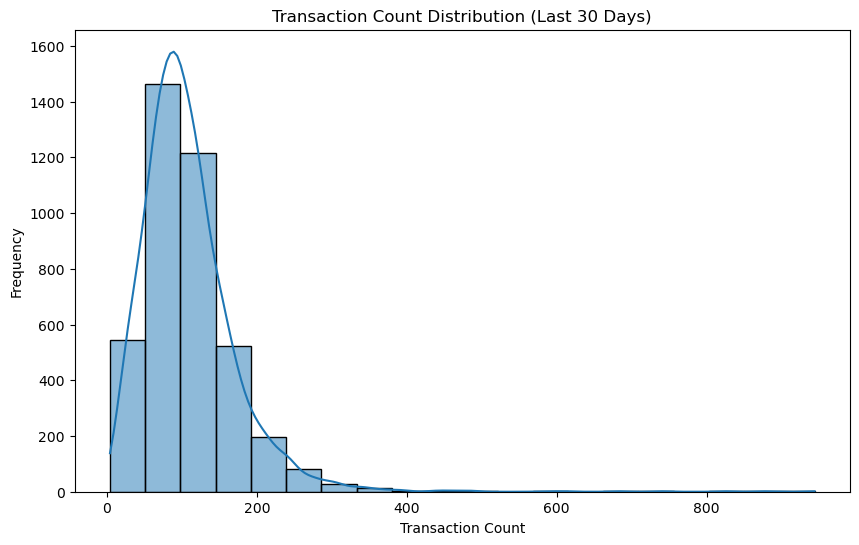

In [75]:
# Visualizations
# Example 1: Histogram of transaction counts over 30 day intervals
plt.figure(figsize=(10, 6))
sns.histplot(data=summary_data, x='transaction_count_last_30_days', bins=20, kde=True)
plt.title('Transaction Count Distribution (Last 30 Days)')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

>> Transaction frequency in a 30-day period peaks at around 100. Interpretation of this peak depends on the context and the individual's financial behavior. 

>> Determine if this is normal financial activity - aka if this financial behavior is consistent with income and spending patterns. If so, a peak of around 100 transactions might be normal. This could suggest that they are actively using their accounts for various purchases, bill payments, and other financial activities.

In [76]:
# Calculate normal transaction frequency (30 days)
summary_data['avg_transaction_count_last_30_days'] = summary_data['transaction_count_last_90_days'] / 3  
# Assuming 30 days in a month

In [77]:
# Calculate deviation from normal transaction frequencies
summary_data['transaction_frequency_deviation'] = summary_data['transaction_count_last_30_days'] - summary_data['avg_transaction_count_last_30_days']

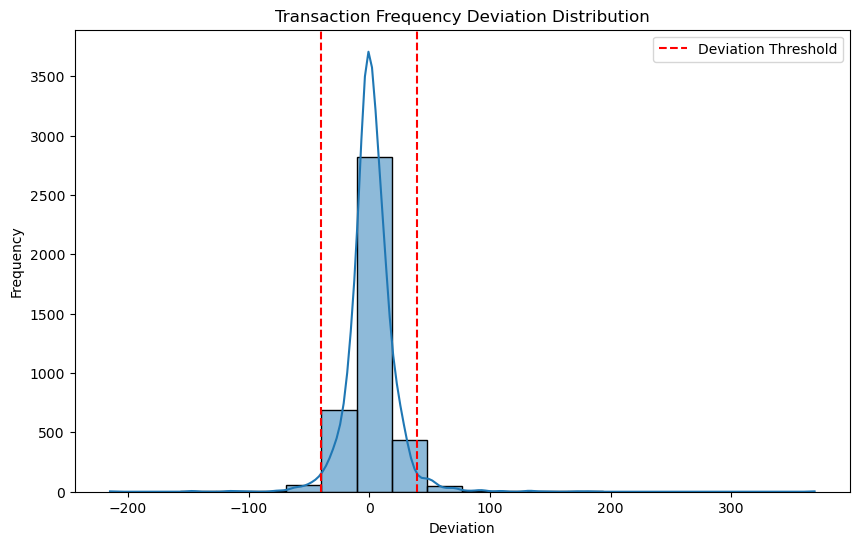

In [78]:
# Define a threshold for significant deviation (e.g., 2 standard deviations)
deviation_threshold = 2 * np.std(summary_data['transaction_frequency_deviation'])

# Identify individuals with significant deviations
significant_deviations = summary_data[summary_data['transaction_frequency_deviation'].abs() > deviation_threshold]

# Visualize deviations
plt.figure(figsize=(10, 6))
sns.histplot(summary_data['transaction_frequency_deviation'], bins=20, kde=True)
plt.axvline(x=deviation_threshold, color='red', linestyle='--', label='Deviation Threshold')
plt.axvline(x=-deviation_threshold, color='red', linestyle='--')
plt.title('Transaction Frequency Deviation Distribution')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [79]:
# Feature Engineering
# Debt to Income Ratio
summary_data['debt_to_income_ratio_30_days'] = summary_data['total_income_narrow_last_30_days'] / summary_data['total_essential_spend_last_30_days']

In [80]:
# Savings Ratio: Total savings divided by total income over specific time intervals
summary_data['savings_ratio_30_days'] = summary_data['total_savings_spend_last_30_days'] / summary_data['total_income_narrow_last_30_days']

In [81]:
# Payment Overdue Ratio (proportion of days an individual spent in overdraft or had low balances)
summary_data['payment_overdue_ratio_30_days'] = summary_data['days_in_overdraft_last_30_days'] / 30 

# Assuming 30 days in a month

In [82]:
# Repeat for 90, 180 and 360 days
summary_data['payment_overdue_ratio_90_days'] = summary_data['days_in_overdraft_last_90_days'] / 90 

summary_data['payment_overdue_ratio_180_days'] = summary_data['days_in_overdraft_last_180_days'] / 180

summary_data['payment_overdue_ratio_360_days'] = summary_data['days_in_overdraft_last_360_days'] / 360 

In [83]:
# Calculate the average spending over different time intervals
# Comparing 30 to 90 days
summary_data['avg_spending_last_30_days'] = (summary_data['total_groceries_spend_last_30_days'] +
                                     summary_data['total_mortgage_and_rent_spend_last_30_days'] +
                                     summary_data['total_bills_and_utilities_spend_last_30_days']) / 3

summary_data['avg_spending_last_90_days'] = (summary_data['total_groceries_spend_last_90_days'] +
                                     summary_data['total_mortgage_and_rent_spend_last_90_days'] +
                                     summary_data['total_bills_and_utilities_spend_last_90_days']) / 3

In [84]:
# Repeat for 180 and 360 days
summary_data['avg_spending_last_180_days'] = (summary_data['total_groceries_spend_last_180_days'] +
                                     summary_data['total_mortgage_and_rent_spend_last_180_days'] +
                                     summary_data['total_bills_and_utilities_spend_last_180_days']) / 3

summary_data['avg_spending_last_360_days'] = (summary_data['total_groceries_spend_last_360_days'] +
                                     summary_data['total_mortgage_and_rent_spend_last_360_days'] +
                                     summary_data['total_bills_and_utilities_spend_last_360_days']) / 3

In [85]:
# Calculate discretionary spending over different time intervals
# Comparing 30 to 90 days
summary_data['discretionary_spending_last_30_days'] = (summary_data['total_cash_withdrawal_spend_last_30_days'] +
                                                summary_data['total_gambling_spend_last_30_days']) 

summary_data['discretionary_spending_last_90_days'] = (summary_data['total_cash_withdrawal_spend_last_90_days'] +
                                                summary_data['total_gambling_spend_last_90_days'])

In [86]:
# Repeat for 180 and 360 days
summary_data['discretionary_spending_last_180_days'] = (summary_data['total_cash_withdrawal_spend_last_180_days'] +
                                                summary_data['total_gambling_spend_last_180_days']) 

summary_data['discretionary_spending_last_360_days'] = (summary_data['total_cash_withdrawal_spend_last_360_days'] +
                                                summary_data['total_gambling_spend_last_360_days'])

In [87]:
# Calculate short-term spending fluctuations
summary_data['spending_fluctuation_30_to_90_days'] = (summary_data['avg_spending_last_90_days'] - 
                                               summary_data['avg_spending_last_30_days'])

In [88]:
# Summary of short term spending behaviour (30 - 90 days)
print(summary_data[['avg_spending_last_30_days', 'avg_spending_last_90_days',
            'discretionary_spending_last_30_days', 'discretionary_spending_last_90_days',
            'spending_fluctuation_30_to_90_days']].describe())

       avg_spending_last_30_days  avg_spending_last_90_days  \
count                4083.000000                4083.000000   
mean                 -197.084804                -589.395844   
std                   215.129603                 617.869961   
min                 -4056.840000               -8678.623333   
25%                  -268.873333                -801.726667   
50%                  -137.043333                -430.683333   
75%                   -56.270000                -183.446667   
max                     0.000000                   0.000000   

       discretionary_spending_last_30_days  \
count                          4083.000000   
mean                           -182.932596   
std                            1259.332495   
min                          -70111.400000   
25%                            -190.000000   
50%                             -55.000000   
75%                              -8.000000   
max                           15276.550000   

       discretion

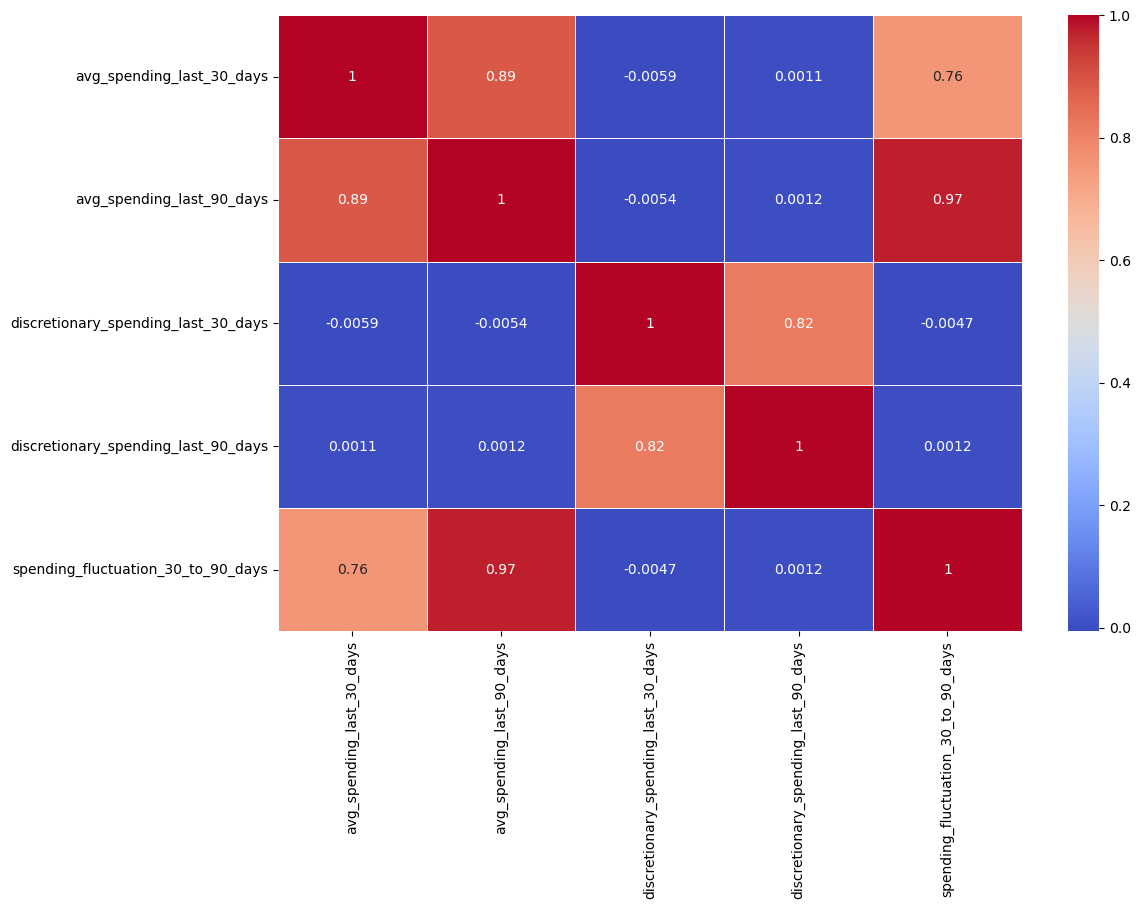

In [89]:
# Show correlation between items in short term spending behaviour
correlation_matrix = summary_data[['avg_spending_last_30_days',
                                   'avg_spending_last_90_days',
                                   'discretionary_spending_last_30_days',
                                   'discretionary_spending_last_90_days',
                                   'spending_fluctuation_30_to_90_days']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

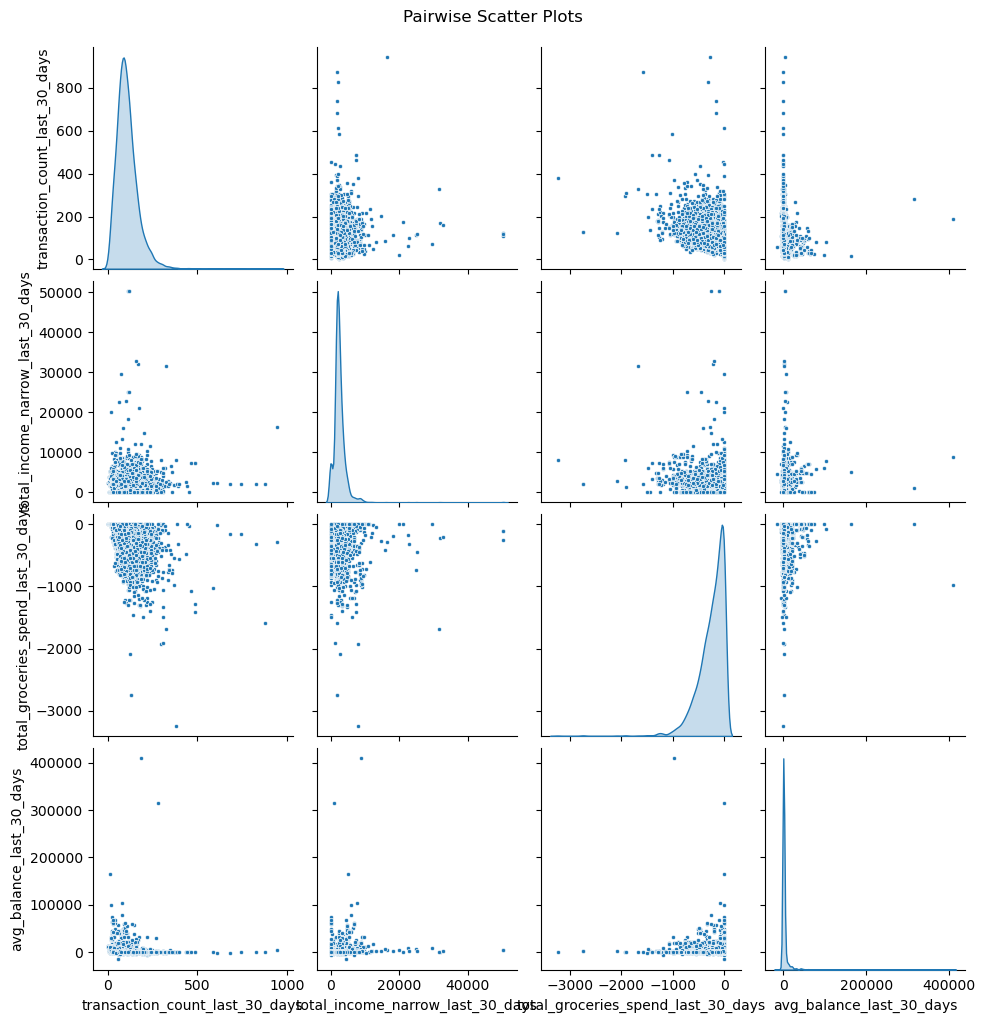

In [90]:
# Pairwise scatter plots
thirty_day_relationship = ['transaction_count_last_30_days', 'total_income_narrow_last_30_days', 'total_groceries_spend_last_30_days', 'avg_balance_last_30_days']

# Create pairwise scatter plots
sns.pairplot(summary_data[thirty_day_relationship], diag_kind='kde', markers='.')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()